# Assignment 1
### Arina Sitnikova 


### 1. Decision theory [13pts]

One successful use of probabilistic models is for building spam filters, which take in an email and take different actions depending on the likelihood that it's spam.

Imagine you are running an email service.
You have a well-calibrated spam classifier that tells you the probability that a particular email is spam: $p(spam|email)$.
You have three options for what to do with each email: You can show it to the user, put it in the spam folder, or delete it entirely.

Depending on whether or not the email really is spam, the user will suffer a different amount of wasted time for the different actions we can take, $L(action, spam)$.

#### 1. [3pts] Plot the expected wasted user time for each of the three possible actions, as a function of the probability of spam: $p(spam|email)$


In [131]:
import pandas as pd
import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
losses = [[10, 0], [1, 50], [0, 200]]
num_actions = len(losses)

In [32]:
def expected_loss_of_action(prob_spam, action):
    return prob_spam*losses[action][0] + (1-prob_spam)*losses[action][1]

In [33]:
prob_range = np.linspace(0, 1, 500)

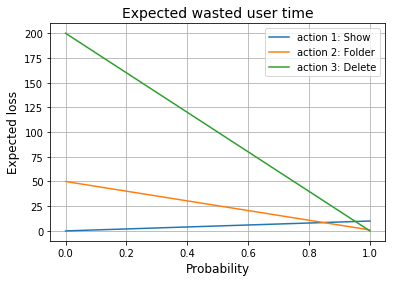

In [200]:
for action in range(num_actions):
    plt.plot(prob_range, expected_loss_of_action(prob_range, action))
    plt.xlabel('Probability', size=12)
    plt.ylabel('Expected loss',size=12)
    plt.xticks(size = 10)
    plt.yticks(size = 10)
    plt.title('Expected wasted user time', size = 14)
    plt.grid(b = True)
    plt.legend(('action 1: Show', 'action 2: Folder', 'action 3: Delete'))

#### 2. [2pts] Write a function that computes the optimal action given the probability of spam.

In [79]:
def optimal_function(prob_spam):
    list1 = []
    for action in range(num_actions):
        outcome = round(prob_spam*losses[action][0] + (1-prob_spam)*losses[action][1], 2)
        list1.append(outcome)
    return list1.index(min(list1))+1, min(list1)

Example:

In [86]:
for i in [0.2, 0.5, 0.8, 0.99, 1]:
    print('Given the probability of {0}, the optimal action is {1} with the losses of {2}'.format(i, optimal_function(i)[0], optimal_function(i)[1]))

Given the probability of 0.2, the optimal action is 1 with the losses of 2.0
Given the probability of 0.5, the optimal action is 1 with the losses of 5.0
Given the probability of 0.8, the optimal action is 1 with the losses of 8.0
Given the probability of 0.99, the optimal action is 2 with the losses of 1.49
Given the probability of 1, the optimal action is 3 with the losses of 0


#### 3. [4pts] Plot the expected loss of the optimal action as a function of the probability of spam. Color the line according to the optimal action for that probability of spam.

In [89]:
prob_range = np.linspace(0, 1, 500)
optimal_losses = []
optimal_actions = []

In [90]:
for p in prob_range:
    optimal_actions.append(optimal_function(p)[0])
    optimal_losses.append(optimal_function(p)[1])

In [205]:
d = {'prob': prob_range, 'loss': optimal_losses, 'action': optimal_actions}
df = pd.DataFrame(data=d)

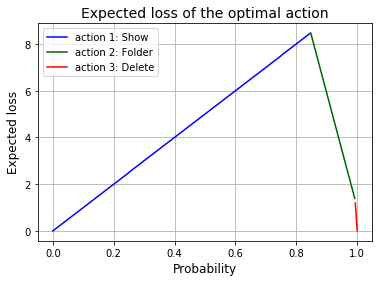

In [207]:
plt.plot(df[df['action'] == 1]['prob'], df[df['action'] == 1]['loss'], c = 'blue', label = 'action 1: Show')
plt.plot(df[df['action'] == 2]['prob'], df[df['action'] == 2]['loss'], c = 'darkgreen', label = 'action 2: Folder')
plt.plot(df[df['action'] == 3]['prob'], df[df['action'] == 3]['loss'], c = 'red', label = 'action 3: Delete')
plt.xlabel('Probability', size=12)
plt.ylabel('Expected loss',size=12)
plt.xticks(size = 10)
plt.yticks(size = 10)
plt.title('Expected loss of the optimal action', size = 14)
plt.grid(b = True)
plt.legend()
plt.show();

#### 4. [4pts] For exactly which range of the probabilities of an email being spam should we delete an email? Find the exact answer by hand using algebra.

In [208]:
df[df['action'] == 3]

,prob,loss,action
496,0.993988,1.2,3
497,0.995992,0.8,3
498,0.997996,0.4,3
499,1.000000,0.0,3


If we put an email in the spam folder instead of deleting it, losses are lower when:

$p*1 + (1-p)*50 \le p*0 + (1-p)*200$ 

$50 - 49*p \le 200 - 200*p$

$50 \le 200 - 151*p$

$151*p \le 150$

$p \le 0.99337748$

Thus, when $p > 0.99337748$, we should delete an email.

### 2. Regression

### 2.1 Manually Derived Linear Regression [10pts]


Suppose that 
$X \in \mathbb{R}^{m \times n}$ with $n \geq m$ 
and $Y \in \mathbb{R}^n$, and that $Y \sim \mathcal{N}(X^T\beta, \sigma^2 I)$.

In this question you will derive the result that the maximum likelihood estimate $\hat\beta$ of $\beta$ is given by

$$
\hat\beta = (XX^T)^{-1}XY
$$

#### 1. [1pts] What happens if $n < m$?



In this case there are more predictors than observations (cases). Therefore, there is no unique solution to a standard linear regression problem. The problem is that the columns (which represent predictors, m) of the matrix will be linearly dependent. For this reason, once the coefficients for n predictors have been found, the coefficients for the rest of the predictors (m-n) can be expressed as linear combinations of those first n predictors. Moreover, as the model gets more variables and the amount of training data shrinks, it becomes increasingly likely that the model overfit, achieving a low error while not representing the true distribution. Performance will therefore be poor when the model is fed with other data from the same distribution. Thus, it is not recommended to use general approach (standard least squares regression).

#### 2. [2pts] What are the expectation and covariance matrix of $\hat\beta$, for a given true value of $\beta$?

$Y = X\beta + \varepsilon$

Given that $\beta^Tx^Ty = y^Tx\beta$ and $x^Tx$ are symmetric,

$E(\hat{\beta}) = E((XX^T)^{-1}XY) = E((X^TX)^{-1}X^T(X\beta + \varepsilon)) = E((X^TX)^{-1}X^TX\beta) + E((X^TX)^{-1}X^T\varepsilon) = E(\beta) + (X^TX)^{-1}X^TE(\varepsilon) = \beta + 0 = \beta$

Therefore, the estimator is unbiased.

$Var(\hat\beta) = Var((XX^T)^{-1}XY) = Var((X^TX)^{-1}X^TY) = (X^TX)^{-1}X^TVar(Y)((X^TX)^{-1}X^T)^T = (X^TX)^{-1}X^TVar(X\beta + \varepsilon)((X^TX)^{-1}X^T)^T = $

$(X^TX)^{-1}X^T\sigma^2_\varepsilon I((X^TX)^{-1}X^T)^T = (X^TX)^{-1}X^T\sigma^2_\varepsilon I X(X^TX)^{-1} = \sigma^2_\varepsilon I (X^TX)^{-1}X^TX(X^TX)^{-1} = \sigma^2_\varepsilon I (X^TX)^{-1} $

#### 3. [2pts] Show that maximizing the likelihood is equivalent to minimizing the squared error $\sum_{i=1}^n (y_i - x_i\beta)^2$. [Hint: Use $\sum_{i=1}^n a_i^2 = a^Ta$]

Minimizing the squared error: 

$\sum_{i=1}^n (y_i-x_i\beta)^2 = (Y-X\beta)^T(Y-X\beta) = (Y^T - \beta^TX^T)(Y-X\beta) = Y^TY-\beta^TX^TY - Y^TX\beta + \beta^TX^TX\beta = $

$ = Y^TY - 2\beta^TX^TY + \beta^TX^TX\beta \rightarrow \min\limits_{\beta}$

$\frac{\partial}{\partial \hat\beta} = -2X^TY + 2X^TX\hat\beta = 0$

$X^TY = X^TX\hat\beta \Rightarrow \hat\beta = (X^TX)^{-1}X^TY$

Maximizing the log likelihood:
    
$ln(L) = -\frac{n}{2}ln(2\pi) -\frac{n}{2}ln(\sigma^2) - \frac{\sum_{i=1}^n (y_i-x_i\beta)^2}{2\sigma^2} = -\frac{n}{2}ln(2\pi) -\frac{n}{2}ln(\sigma^2) - \frac{(Y-X\beta)^T(Y-X\beta)}{2\sigma^2} \rightarrow \max\limits_{\beta}$

$\frac{\partial}{\partial \hat\beta} = -\frac{1}{2\sigma^2}\frac{\partial(Y^TY - 2X^T\hat\beta Y + \hat\beta^TX^TX\hat\beta)}{\partial \hat\beta} =  -\frac{1}{2\sigma^2}(-2X^TY + 2X^TX\hat\beta) = 0$

$2 X^TY = 2 X^TX\hat\beta \Rightarrow X^TY = X^TX\hat\beta \Rightarrow \hat\beta = (X^TX)^{-1}X^TY$

#### 4. [2pts] Write the squared error in vector notation, (see above hint), expand the expression, and collect like terms. [Hint: Use $\beta^Tx^Ty = y^Tx\beta$ and $x^Tx$ is symmetric]



$RSS = e^Te = (Y-X\beta)^T(Y-X\beta) = (Y^T - \beta^TX^T)(Y-X\beta) = Y^TY-\beta^TX^TY - Y^TX\beta + \beta^TX^TX\beta = Y^TY - 2\beta^TX^TY + \beta^TX^TX\beta$

#### 5. [3pts] Use the likelihood expression to write the negative log-likelihood. Write the derivative of the negative log-likelihood with respect to $\beta$, set equal to zero, and solve to show the maximum likelihood estimate $\hat\beta$ as above. 




$-ln(L) = \frac{n}{2}ln(2\pi) +\frac{n}{2}ln(\sigma^2) + \frac{\sum_{i=1}^n (y_i-x_i\beta)^2}{2\sigma^2} = \frac{n}{2}ln(2\pi) +\frac{n}{2}ln(\sigma^2) + \frac{(Y-X\beta)^T(Y-X\beta)}{2\sigma^2} \rightarrow \min\limits_{\beta}$

$\frac{\partial}{\partial \hat\beta} = \frac{1}{2\sigma^2}\frac{\partial(Y^TY - 2X^T\hat\beta Y + \hat\beta^TX^TX\hat\beta)}{\partial \hat\beta} =  \frac{1}{2\sigma^2}(-2X^TY + 2X^TX\hat\beta) = 0$

$2 X^TY = 2 X^TX\hat\beta \Rightarrow X^TY = X^TX\hat\beta \Rightarrow \hat\beta = (X^TX)^{-1}X^TY$

Again, since $x^Tx$ is symmetric, $(X^TX)^{-1}X^TY$ is equivalent to $(XX^T)^{-1}XY$.

### 2.2 Toy Data [2pts]

For visualization purposes and to minimize computational resources we will work with 1-dimensional toy data. 

That is $X \in \mathbb{R}^{m \times n}$ where $m=1$.

We will learn models for 3 target functions

* `target_f1`, linear trend with constant noise.
* `target_f2`, linear trend with heteroskedastic noise.
* `target_f3`, non-linear trend with heteroskedastic noise.


```julia

using LinearAlgebra

function target_f1(x, σ_true=0.3)
  noise = randn(size(x))
  y = 2x .+ σ_true.*noise
  return vec(y)
end

function target_f2(x)
  noise = randn(size(x))
  y = 2x + norm.(x)*0.3.*noise
  return vec(y)
end

function target_f3(x)
  noise = randn(size(x))
  y = 2x + 5sin.(0.5*x) + norm.(x)*0.3.*noise
  return vec(y)
end

```


#### 1. [1pts] Write a function which produces a batch of data $x \sim \text{Uniform}(0,20)$ and `y = target_f(x)`

The code above was in Python, now I'm switching back to Julia.

```julia
function sample_batch(target_f, batch_size)
  x = rand(Uniform(0, 20), batch_size)
  y = target_f(x)
  return (x,y)
end

```

```julia

using Test
@testset "sample dimensions are correct" begin
  m = 1 # dimensionality
  n = 200 # batch-size
  for target_f in (target_f1, target_f2, target_f3)
    x,y = sample_batch(target_f,n)
    @test size(x) == (m,n)
    @test size(y) == (n,)
  end
end

```

#### 2. [1pts] For all three targets, plot a $n=1000$ sample of the data. **Note: You will use these plots later, in your writeup display once other questions are complete.**

```julia
using Plots

x1,y1 = sample_batch(target_f1, 1000)
plot_f1 = scatter(x1, y1, title = "Target 1: linear trend with constant noise", xlabel = "x", ylabel = "y", legend = false)
```

<img src="plot1.png">

```julia
x2,y2 = sample_batch(target_f2, 1000)
plot_f2 = scatter(x2, y2, title = "Target 2: linear trend with heteroskedastic noise", xlabel = "x", ylabel = "y", legend = false)
```

<img src="plot2.png">

```julia
x3,y3 = sample_batch(target_f3, 1000)
plot_f3 = scatter(x3, y3, title = "Target 3: non-linear trend with heteroskedastic noise", xlabel = "x", ylabel = "y", legend = false)
```

<img src="plot3.png">

### 2.3 Linear Regression Model with $\hat \beta$ MLE [4pts]

#### 1. [2pts] Program the function that computes the the maximum likelihood estimate given $X$ and $Y$. Use it to compute the estimate $\hat \beta$ for a $n=1000$ sample from each target function.

```julia
function beta_mle(X,Y)
  beta = (transpose(X)*X)^(-1)*transpose(X)*Y
  return beta
end

n=1000 # batch_size

x_1, y_1 = sample_batch(target_f1, n)
β_mle_1 = beta_mle(x_1, y_1)

x_2, y_2 = sample_batch(target_f2, n)
β_mle_2 = beta_mle(x_2, y_2)

x_3, y_3 = sample_batch(target_f3, n)
β_mle_3 = beta_mle(x_3, y_3)

```

Output:

$\beta\_mle\_1 = 1.9990467212456586$

$\beta\_mle\_2 = 1.9843778375927765$

$\beta\_mle\_3 = 2.0629142503562474$

#### 2. [2pts] For each function, plot the linear regression model given by $Y \sim \mathcal{N}(X^T\hat\beta, \sigma^2 I)$ for $\sigma=1.$. This plot should have the line of best fit given by the maximum likelihood estimate, as well as a shaded region around the line corresponding to plus/minus one standard deviation (i.e. the fixed uncertainty $\sigma=1.0$). Using `Plots.jl` this shaded uncertainty region can be achieved with the `ribbon` keyword argument. **Display 3 plots, one for each target function, showing samples of data and maximum likelihood estimate linear regression model**


```julia
scatter(x1, y1, title = "Target 1: linear trend with constant noise", xlabel = "x", ylabel = "y", legend = false)
plot!(x1, β_mle_1 * x1, ribbon = rand(length(x1)), fillalpha=.9, lw = 2)
```

<img src="fit1.png">


```julia
scatter(x2, y2, title = "Target 2: linear trend with heteroskedastic noise", xlabel = "x", ylabel = "y", legend = false)
plot!(x2, β_mle_2 * x2, ribbon = rand(length(x2)), fillalpha=.9, lw = 2)
```

<img src="fit2.png">


```julia
scatter(x3, y3, title = "Target 3: non-linear trend with heteroskedastic noise", xlabel = "x", ylabel = "y", legend = false)
plot!(x3, β_mle_3 * x3, ribbon = rand(length(x3)), fillalpha=.9, lw = 2)
```

<img src="fit3.png">

### 2.4 Log-likelihood of Data Under Model [6pts]

#### 1. [2pts] Write code for the function that computes the likelihood of $x$ under the Gaussian distribution $\mathcal{N}(μ,σ)$. For reasons that will be clear later, this function should be able to broadcast to the case where $x, \mu, \sigma$ are all vector valued and return a vector of likelihoods with equivalent length, i.e., $x_i \sim \mathcal{N}(\mu_i,\sigma_i)$.


```julia
function gaussian_log_likelihood(μ, σ, x)
  n = length(x)
  ll = -(n/2)*log(2*pi) - (n/2)*log(σ^2) - (1/(2σ^2))*sum((x-μ)^2)
  return ll
end
```

```julia
# Test Gaussian likelihood against standard implementation
@testset "Gaussian log likelihood" begin
using Distributions: pdf, Normal
# Scalar mean and variance
x = randn()
μ = randn()
σ = rand()
@test size(gaussian_log_likelihood(μ,σ,x)) == () # Scalar log-likelihood
@test gaussian_log_likelihood.(μ,σ,x) ≈ log.(pdf.(Normal(μ,σ),x)) # Correct Value
# Vector valued x under constant mean and variance
x = randn(100)
μ = randn()
σ = rand()
@test size(gaussian_log_likelihood.(μ,σ,x)) == (100,) # Vector of log-likelihoods
@test gaussian_log_likelihood.(μ,σ,x) ≈ log.(pdf.(Normal(μ,σ),x)) # Correct Values
# Vector valued x under vector valued mean and variance
x = randn(10)
μ = randn(10)
σ = rand(10)
@test size(gaussian_log_likelihood.(μ,σ,x)) == (10,) # Vector of log-likelihoods
@test gaussian_log_likelihood.(μ,σ,x) ≈ log.(pdf.(Normal.(μ,σ),x)) # Correct Values
end
```

Each test was passed.

#### 2. [2pts] Use your gaussian log-likelihood function to write the code which computes the negative log-likelihood of the target value $Y$ under the model $Y \sim \mathcal{N}(X^T\beta, \sigma^2*I)$ for a given value of $\beta$.

```julia
function lr_model_nll(β,x,y,σ)
    n = length(x)
    nll = (n/2)*log(2*pi) + (n/2)*log(σ^2) + (1/(2σ^2))*(transpose(y-x*β)*(y - x*β))
    return nll
end
```

#### 3. [1pts] Use this function to compute and report the negative-log-likelihood of a $n\in \{10,100,1000\}$ batch of data under the model with the maximum-likelihood estimate $\hat\beta$ and $\sigma \in \{0.1,0.3,1.,2.\}$ for each target function.


```julia
for n in (10,100,1000)
    println("--------  $n  ------------")
    for target_f in (target_f1,target_f2, target_f3)
      println("--------  $target_f  ------------")
      for σ_model in (0.1,0.3,1.,2.)
        println("--------  $σ_model  ------------")
        x,y = sample_batch(target_f,n)
        β_mle = beta_mle(x,y)
        nll = lr_model_nll(β_mle,x,y,σ_model)
        println("Negative Log-Likelihood: $nll")
      end
    end
end
```

##### Output:

--------  10  ------------

--------  target_f1  ------------

--------  0.1  ------------

Negative Log-Likelihood: 43.96141914088841

--------  0.3  ------------

Negative Log-Likelihood: 0.2616052980889845

--------  1.0  ------------

Negative Log-Likelihood: 9.689855638862772

--------  2.0  ------------

Negative Log-Likelihood: 16.16985137614926

--------  target_f2  ------------

--------  0.1  ------------

Negative Log-Likelihood: 2262.59975990307

--------  0.3  ------------

Negative Log-Likelihood: 748.3853006778675

--------  1.0  ------------

Negative Log-Likelihood: 137.00721880455478

--------  2.0  ------------

Negative Log-Likelihood: 24.614513095654708

--------  target_f3  ------------

--------  0.1  ------------

Negative Log-Likelihood: 4195.497804226004

--------  0.3  ------------

Negative Log-Likelihood: 2317.377637813082

--------  1.0  ------------

Negative Log-Likelihood: 181.25901972760082

--------  2.0  ------------

Negative Log-Likelihood: 33.51558764107029

--------  100  ------------

--------  target_f1  ------------

--------  0.1  ------------

Negative Log-Likelihood: 333.1376353773263

--------  0.3  ------------

Negative Log-Likelihood: 11.3027751182834

--------  1.0  ------------

Negative Log-Likelihood: 96.67075100220865

--------  2.0  ------------

Negative Log-Likelihood: 162.44026350165566

--------  target_f2  ------------

--------  0.1  ------------

Negative Log-Likelihood: 60011.65669340725

--------  0.3  ------------

Negative Log-Likelihood: 8375.220605412876

--------  1.0  ------------

Negative Log-Likelihood: 528.1539572832497

--------  2.0  ------------

Negative Log-Likelihood: 292.65752846717305

--------  target_f3  ------------

--------  0.1  ------------

Negative Log-Likelihood: 97784.69993592185

--------  0.3  ------------

Negative Log-Likelihood: 11933.159068446384

--------  1.0  ------------

Negative Log-Likelihood: 1179.133244681891

--------  2.0  ------------

Negative Log-Likelihood: 412.45533733831167

--------  1000  ------------

--------  target_f1  ------------

--------  0.1  ------------

Negative Log-Likelihood: 3309.307564504479

--------  0.3  ------------

Negative Log-Likelihood: 222.7933118847074

--------  1.0  ------------

Negative Log-Likelihood: 961.4852835198192

--------  2.0  ------------

Negative Log-Likelihood: 1623.9312796689442

--------  target_f2  ------------

--------  0.1  ------------

Negative Log-Likelihood: 586707.2320849734

--------  0.3  ------------

Negative Log-Likelihood: 77360.21996532592

--------  1.0  ------------

Negative Log-Likelihood: 6319.899734804776

--------  2.0  ------------

Negative Log-Likelihood: 3177.6517615381363

--------  target_f3  ------------

--------  0.1  ------------

Negative Log-Likelihood: 1.18091961323346e6

--------  0.3  ------------

Negative Log-Likelihood: 138990.64671152452

--------  1.0  ------------

Negative Log-Likelihood: 12801.760423340575

--------  2.0  ------------

Negative Log-Likelihood: 4546.194098687471

#### 4. [1pts] For each target function, what is the best choice of $\sigma$? 



Since we computed *negative* log likelihood function, we would want to minimize it to get the best estimator. Therefore, we would look for the min value of the criteria. For target function 1, $\sigma = 0.3$ gives the lowest value of the negative log-likelihood function. In case of target function 2 and 3, the lowest value is achieved with $\sigma = 2$ for both functions. This holds regardless of the number of observations n.  

### 2.5 Automatic Differentiation and Maximizing Likelihood [3pts]

In a previous question you derived the expression for the derivative of the negative log-likelihood with respect to $\beta$.
We will use that to test the gradients produced by automatic differentiation.

#### 1. [3pts] For a random value of $\beta$, $\sigma$, and $n=100$ sample from a target function, use automatic differentiation to compute the derivative of the negative log-likelihood of the sampled data with respect $\beta$. Test that this is equivalent to the hand-derived value.


```julia
using Zygote: gradient

@testset "Gradients wrt parameter" begin
β_test = randn()
σ_test = rand()
x,y = sample_batch(target_f1,100)
ad_grad = gradient(β -> lr_model_nll(β,x,y,σ_test), β_test)
hand_derivative = 1/(2*σ_test^2)*(-2*x'*y+2*x'*x*β_test)
@test ad_grad[1] ≈ hand_derivative
end
```

The test was passed.

### 2.5.1 Train Linear Regression Model with Gradient Descent [5pts]

In this question we will compute gradients of of negative log-likelihood with respect to $\beta$.
We will use gradient descent to find $\beta$ that maximizes the likelihood.

#### 1. [3pts] Write a function `train_lin_reg` that accepts a target function and an initial estimate for $\beta$ and some hyperparameters for batch-size, model variance, learning rate, and number of iterations.

    Then, for each iteration:
    * sample data from the target function
    * compute gradients of negative log-likelihood with respect to $\beta$
    * update the estimate of $\beta$ with gradient descent with specified learning rate
    and, after all iterations, returns the final estimate of $\beta$.


```julia
using Logging # Print training progress to REPL, not pdf

function train_lin_reg(target_f, β_init; bs= 100, lr = 1e-6, iters=1000, σ_model = 1. )
    β_curr = β_init
    for i in 1:iters
      x,y = sample_batch(target_f,bs)
      @info "loss: $(lr_model_nll(β_curr,x,y,σ_model))  β: $β_curr" 
      grad_β = gradient(β -> lr_model_nll(β,x,y,σ_model), β_curr)
      β_curr = β_curr - lr*grad_β[1]
    end
    return β_curr
end
```

#### 2. [2pts] For each target function, start with an initial parameter $\beta$, learn an estimate for $\beta_\text{learned}$ by gradient descent. Then plot a $n=1000$ sample of the data and the learned linear regression model with shaded region for uncertainty corresponding to plus/minus one standard deviation.


```julia
β_init = 1000*randn() # Initial parameter
for target_f in (target_f1,target_f2, target_f3)
    β_learned = train_lin_reg(target_f, β_init; bs= 100, lr = 1e-6, iters=1000, σ_model = 1. )
    print(β_learned)
end


for target_f in (target_f1,target_f2, target_f3)
    x, y = sample_batch(target_f,1000)
    β_learned = train_lin_reg(target_f, β_init; bs= 100, lr = 1e-6, iters=1000, σ_model = 1. )
    display(scatter(x, y, title = "$target_f", xlabel = "x", ylabel = "y", legend = false))
    display(plot!(x, β_learned*x, ribbon = rand(length(x)), fillalpha=.9, lw = 2))
end
```

<img src="grad_desc1.png">
<img src="grad_desc2.png">
<img src="grad_desc3.png">